In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("anime-dataset-2023.csv")
df.head()


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


Dataset Description (Anime Dataset 2023)

This dataset contains detailed information about ~25,000 anime titles, collected from MyAnimeList. It includes metadata related to anime identity, content, popularity, ratings, and audience engagement. The dataset is useful for EDA, recommendation systems, and popularity or rating prediction.

🔑 Important Columns & Their Meaning (Simple Explanation)

**anime_id :**
A unique identifier assigned to each anime. It helps in distinguishing one anime from another without ambiguity.

**Name :**
The original or commonly known title of the anime. This is the primary column used for identification and display.

**English name :**
The official English title of the anime. Useful for international audiences and English-based analysis.

**Genres :**
Lists the genres (e.g., Action, Comedy, Fantasy) associated with the anime. This column is crucial for understanding viewer preferences and for building recommendation systems.

**Type  :**
Specifies the format of the anime such as TV, Movie, OVA, ONA, Music, or Special. Helps analyze production trends and content distribution.

**Episodes :**
Indicates the total number of episodes. Useful to compare short vs long-running anime and viewer commitment.

**Score :**⭐
The average user rating given to an anime. This represents the perceived quality of the anime and is a key target variable in analysis.

**Scored By :**
Number of users who rated the anime. Higher values indicate more reliable and stable scores.

**Rank :**
Rank of the anime based on its score. Lower rank means higher-rated anime.

**Popularity :**
Rank based on how many users follow or know the anime. It reflects reach and visibility, not quality.

**Members :**⭐
Total number of users who have added the anime to their list. This is a strong indicator of popularity and fan base size.

**Favorites :**
Number of users who marked the anime as their favorite. Shows emotional connection with the audience.

**Rating
Age rating such as PG-13, R, etc. Useful for audience segmentation.

Aired
Release period of the anime. Helpful for trend analysis over ti

In [ ]:
df.shape


(24905, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [ ]:
df.describe()

,anime_id,Popularity,Favorites,Members
count,24905.000000,24905.000000,24905.000000,2.490500e+04
mean,29776.709014,12265.388356,432.595222,3.710496e+04
std,17976.076290,7187.428393,4353.181647,1.568252e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,10507.000000,6040.000000,0.000000,2.090000e+02
50%,34628.000000,12265.000000,1.000000,1.056000e+03
75%,45240.000000,18491.000000,18.000000,9.326000e+03
max,55735.000000,24723.000000,217606.000000,3.744541e+06


In [ ]:
df.isnull().sum()

,0
anime_id,0
Name,0
English name,0
Other name,0
Score,0
Genres,0
Synopsis,0
Type,0
Episodes,0
Aired,0


In [ ]:
# removing duplicates

df = df.drop_duplicates()
df.shape


(24905, 24)

In [ ]:
# we need to convert Score column to numeric

df["Score"] = pd.to_numeric(df["Score"], errors="coerce")


In [ ]:
# Filling numerical columns with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [ ]:
df.isnull().sum()

,0
anime_id,0
Name,0
English name,0
Other name,0
Score,0
Genres,0
Synopsis,0
Type,0
Episodes,0
Aired,0


## EDA (ExplORATORY DATA ANALYSIS)

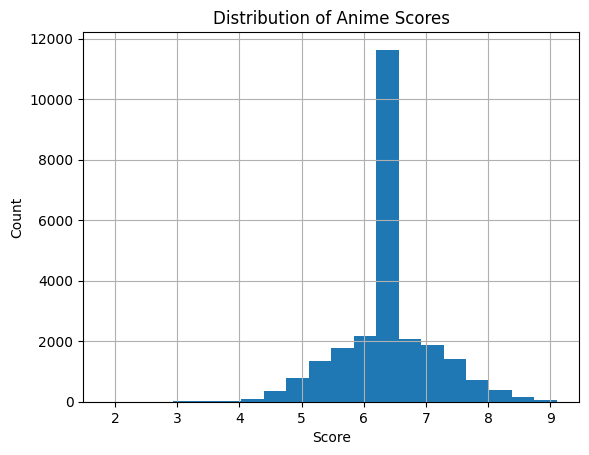

In [ ]:
# Distribution of Anime Scores

plt.figure()
df["Score"].hist(bins=20)
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Distribution of Anime Scores")
plt.show()

###Insight

Most anime scores lie between 5.5 and 7.5, and Very few anime have scores below 4 or above 9 , that Indicates a normal distribution

Extreme ratings are rare → most anime are average to good

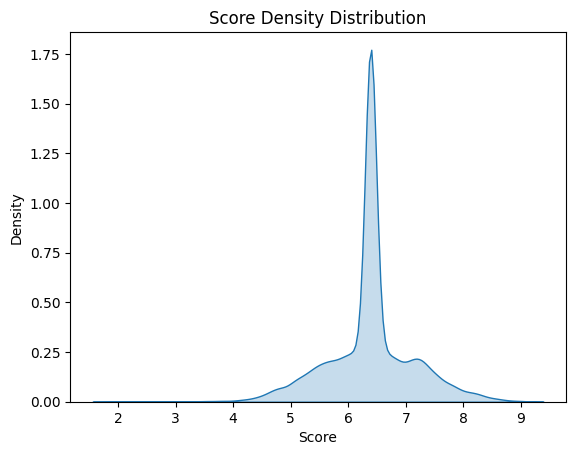

In [ ]:
# Score Distribution (Seaborn KDE)
plt.figure()
sns.kdeplot(df["Score"], fill=True)
plt.title("Score Density Distribution")
plt.xlabel("Score")
plt.show()


### Insight

Peak around 6.5
, Audience tends to give moderate ratings

Confirms histogram observation smoothly

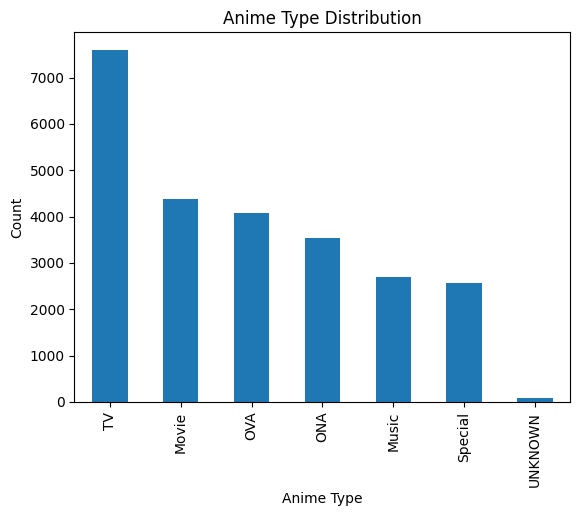

In [ ]:
## Anime Type Count

plt.figure()
df["Type"].value_counts().plot(kind="bar")
plt.xlabel("Anime Type")
plt.ylabel("Count")
plt.title("Anime Type Distribution")
plt.show()


### Insight

TV anime dominates the dataset , Movies and OVAs are second most common
, Music & Special anime are least produced

Industry focus is clearly on TV series

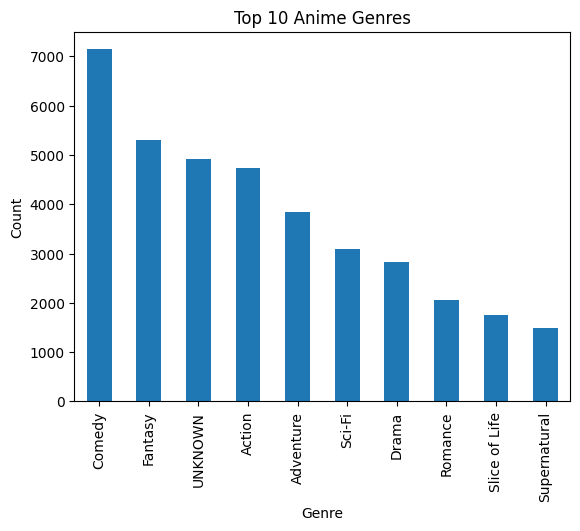

In [ ]:
genres = df["Genres"].str.split(", ")
genres_exploded = genres.explode()

plt.figure()
genres_exploded.value_counts().head(10).plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 10 Anime Genres")
plt.show()


### Insight

Comedy, Fantasy, Action are the most common genres

Viewers prefer:

Light entertainment (Comedy)

Imagination & adventure (Fantasy, Action)

Romance & Slice of Life are popular but secondary

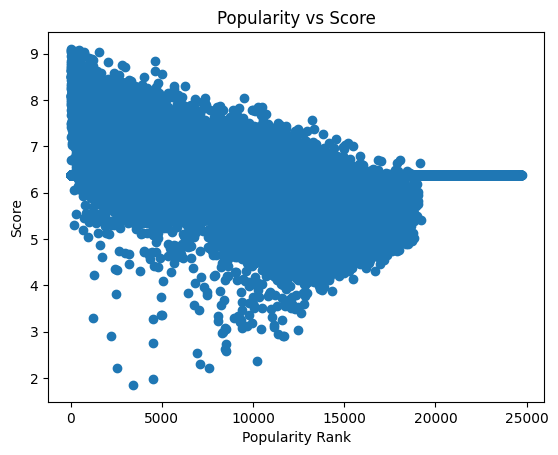

In [ ]:
plt.figure()
plt.scatter(df["Popularity"], df["Score"])
plt.xlabel("Popularity Rank")
plt.ylabel("Score")
plt.title("Popularity vs Score")
plt.show()

### Insight

Lower popularity rank (more popular anime) generally has higher scores

However:

Some less popular anime still have good ratings

Popularity ≠ Quality always

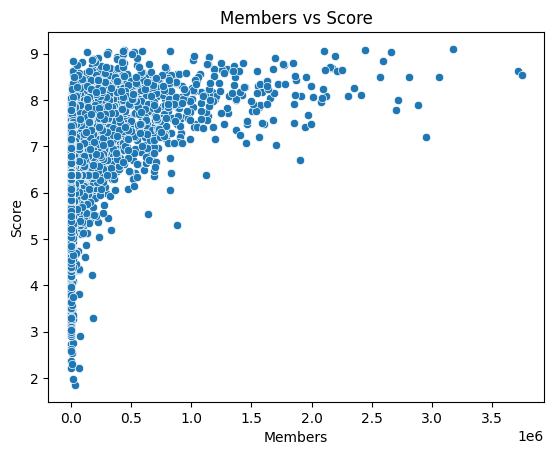

In [ ]:
plt.figure()
sns.scatterplot(x=df["Members"], y=df["Score"])
plt.title("Members vs Score")
plt.xlabel("Members")
plt.ylabel("Score")
plt.show()


### Insight

Highly popular anime usually score above average

Viral popularity helps but does not ensure excellent quality

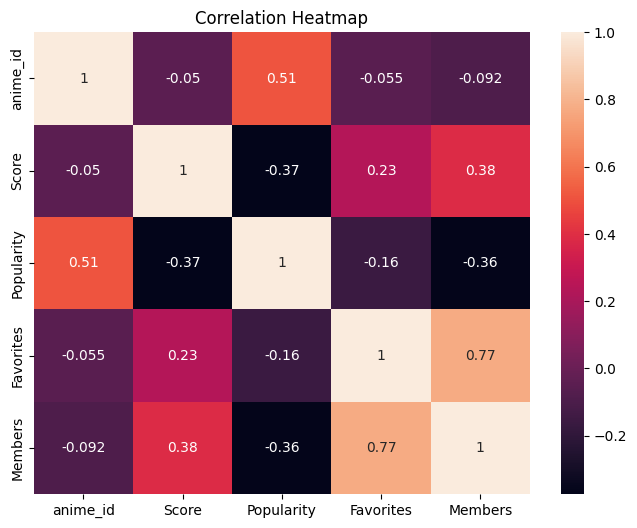

In [ ]:
## Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


### Insight

Members & Popularity are strongly related

Score has weak correlation with popularity

Confirms ratings are subjective

In [ ]:
df.sort_values("Members", ascending=False)[["Name", "Members"]].head(10)


,Name,Members
7428,Shingeki no Kyojin,3744541
1393,Death Note,3713315
3961,Fullmetal Alchemist: Brotherhood,3176556
10408,One Punch Man,3058666
6596,Sword Art Online,2951821
11134,Boku no Hero Academia,2882333
14539,Kimetsu no Yaiba,2808712
10,Naruto,2717330
8619,Tokyo Ghoul,2699241
6456,Hunter x Hunter (2011),2656870


#### Insight

Long-running & mainstream anime dominate

Action + strong storytelling attracts mass audience

## Summary :

The dataset contains around 25k anime records with minimal missing values, making it reliable after basic cleaning.

Most anime scores fall between 5.5 and 7.5, showing that average-to-good ratings are most common.

TV anime dominates the dataset, indicating that serialized content is the primary production format.

Comedy, Fantasy, and Action are the most frequent genres, reflecting audience preference for entertainment and adventure.

Popularity and score show a weak relationship, meaning highly popular anime are not always the highest rated.

## Conclusion :

The anime dataset is clean, balanced, and suitable for deeper analysis or machine learning tasks.

Audience engagement is driven more by genre and format than by ratings alone.

Popularity metrics (members, rank) reflect reach, while scores reflect perceived quality.

Several less-popular anime still achieve good scores, indicating the presence of hidden gems.

Overall, the dataset provides strong insights into viewer preferences and industry trends.